# Decision Boundaries for Classifiers

For classifiers, we can visualize the boundary created between the classes by plotting the contour plot of the classification result
as a function of the variables involved.

The big problem wiht these plots is that they can really only show two variables at a time in the biplot.

These types of plots do show us some interesting things about the shape of the boundaries that we can create with different types of models,  so we can get a bit of insight into how the model is constructing boundaries.

see

https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

and the sklearn and matplotlib manuals

Checked 1/17/2023

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

 Sklearn has a bunch of classic data set generators that we can use in learning about model performance 
    
Below the "blobs" generator is used to generate some 2D predictor data and a target.  We may look at some other examples

In [2]:
# generate dataset-using sklearn generator

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=26, cluster_std=3)

In [3]:
X.shape

(1000, 2)

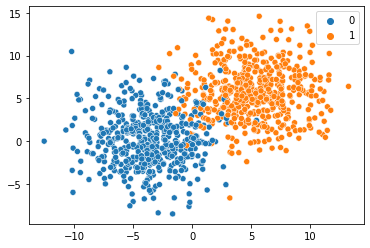

In [4]:
# Here is a quick plot of the data

g=sns.scatterplot(x=X[:,0],y=X[:,1], hue=y)

In [5]:
X_df = pd.DataFrame(X, columns=['x1','x2'])
X_df.head()

,x1,x2
0,3.368579,11.595549
1,5.434311,5.140295
2,-3.277207,7.330728
3,-2.352273,0.278248
4,-3.304148,-3.931708


In [6]:
# define the model- using a linear regression here

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# fit the model
model.fit(X, y)

LogisticRegression()

In [7]:
# make predictions
y_pred = model.predict(X)
acc = sklearn.metrics.accuracy_score(y, y_pred)
print('Accuracy: %.3f' % acc)


Accuracy: 0.964


In [ ]:
Now, we will create a contour plot using matplotlib to show what the boundary used in the classification looks like

To do this we

-figure out the range of the predictors

-Generate a pair of vectors X1grid and X2grid that span the range of x1 and x2 values we are interested in,   these two vectors form the "edges" of a square 
   grid of cells of the plotting area

-Generate the meshgrid,  which is the set of (x1,x2) pairs that define all the cells or positions in a square grid that covers the entire plot area

-Flatten these grid into flattened versions of the grid,  so we can feed this data for the grid into the model

-Feed the grid positions into the model, to generate a predicted classification at each location in the grid

SyntaxError: invalid syntax (Temp/ipykernel_32264/1090232561.py, line 1)

In [8]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

In [9]:
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

In [10]:
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

In [11]:
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [12]:
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


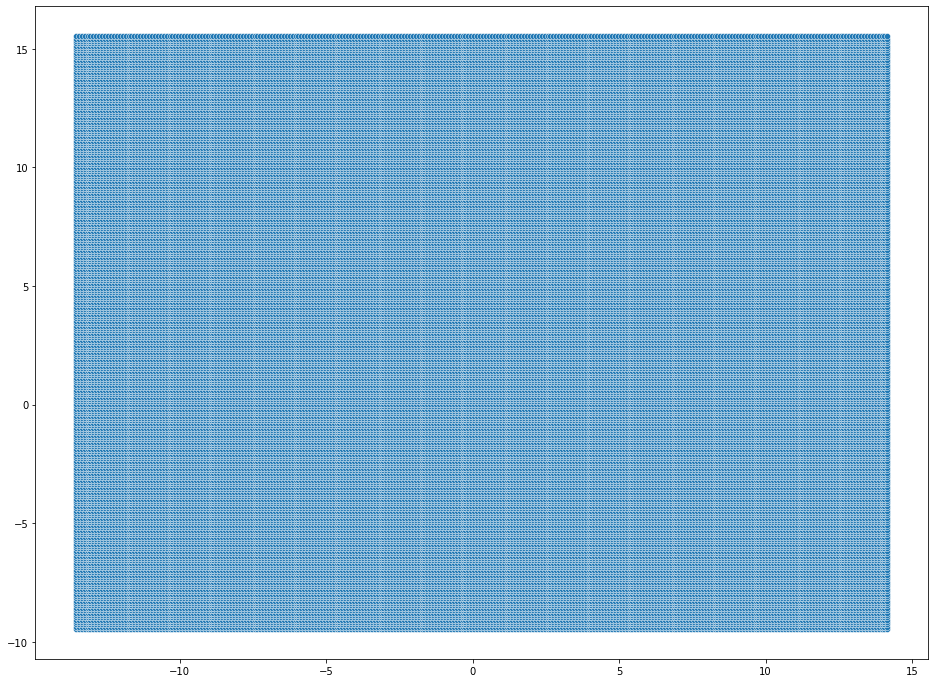

In [13]:
# just to look at the grid points, we could biplot them
from matplotlib.pyplot import figure

figure(figsize=(16, 12))

sns.scatterplot(grid[:,0],grid[:,1])

In [14]:
# make predictions for the grid- so at each grid point,  compute the predicted class
y_pred_grid = model.predict(grid)

In [15]:
# reshape the predictions back into a grid
zz = y_pred_grid.reshape(xx.shape)

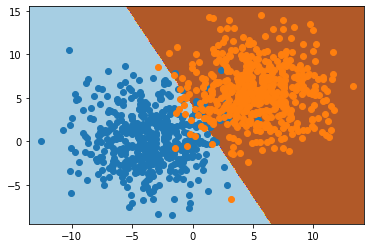

In [16]:
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# add points to the plot, for the original data
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

In [17]:
# make predictions for the grid,  using probabilities this time
yhat = model.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]

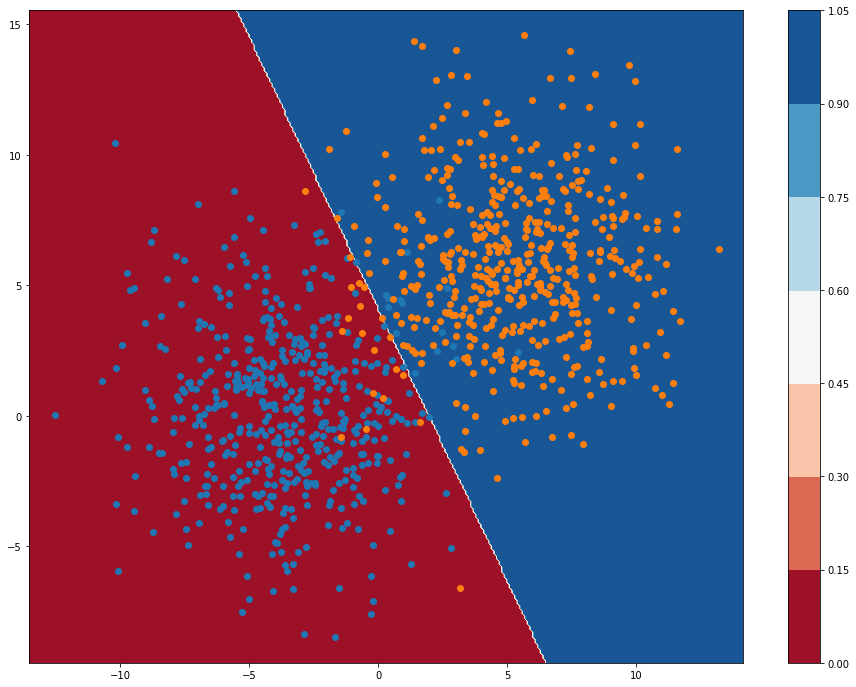

In [18]:
from matplotlib.pyplot import figure

figure(figsize=(16, 12))


# reshape the predictions back into a grid
zz2 = y_pred_grid.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz2, cmap='RdBu')
#plt.contour(xx, yy, zz2, levels=14, linewidths=0.2, colors='k')
# add a legend, called a color bar
plt.colorbar(c)


# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

# A more complex model, the Banknote data set

In [ ]:
# looking at the banknote data set- create the decision boundary plot- this is the load function for local data

# Change your infile value
# get the bank note data set from the UCI Repository

infile="C:\\Users\\hdavi\\Dropbox\\Data_Analytics\\DAT_514_Machine_Learning\\Python_Code_2022\\data_banknote_authentication.txt"

bnote=pd.read_csv(infile,header=None)

bnote.head()

In [19]:
# this is the process for importing the data from your Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
path = "/content/drive/MyDrive/DAT514_data/data_banknote_authentication.txt"

bnote=pd.read_csv(path,header=None)

bnote.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [21]:
bnote.columns=['VarWavelet','SkewWavelet','KurWavelet','entropy','class']
X=bnote.iloc[:,0:4]
y=bnote.iloc[:,4]

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=8, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print (sum(y_pred_rf==y_test)/y_test.size)

0.9672727272727273


In [24]:
for name, score in zip(X_train.columns, rnd_clf.feature_importances_):
    print(name, score)

VarWavelet 0.6223748982977421
SkewWavelet 0.2174162495039604
KurWavelet 0.11989088596961717
entropy 0.04031796622868052


In [25]:
# define bounds of the domain
min1, max1 = X_train.VarWavelet.min()-1,  X_train.VarWavelet.max()+1
min2, max2 = X_train.SkewWavelet.min()-1, X_train.SkewWavelet.max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))


In [26]:
fill_1=np.full([grid.shape[0],1],X_train.KurWavelet.mean())
fill_2=np.full([grid.shape[0],1],X_train.entropy.mean())

grid_plus=np.hstack((grid,fill_1,fill_2))

In [27]:
grid.shape

(45474, 2)

In [28]:
# make predictions for the grid,  using probabilities this time
yhat = rnd_clf.predict_proba(grid_plus)
# keep just the probabilities for class 0
y_hat3 = yhat[:, 0] 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Boundary at Mean KurWavelet and Entropy')

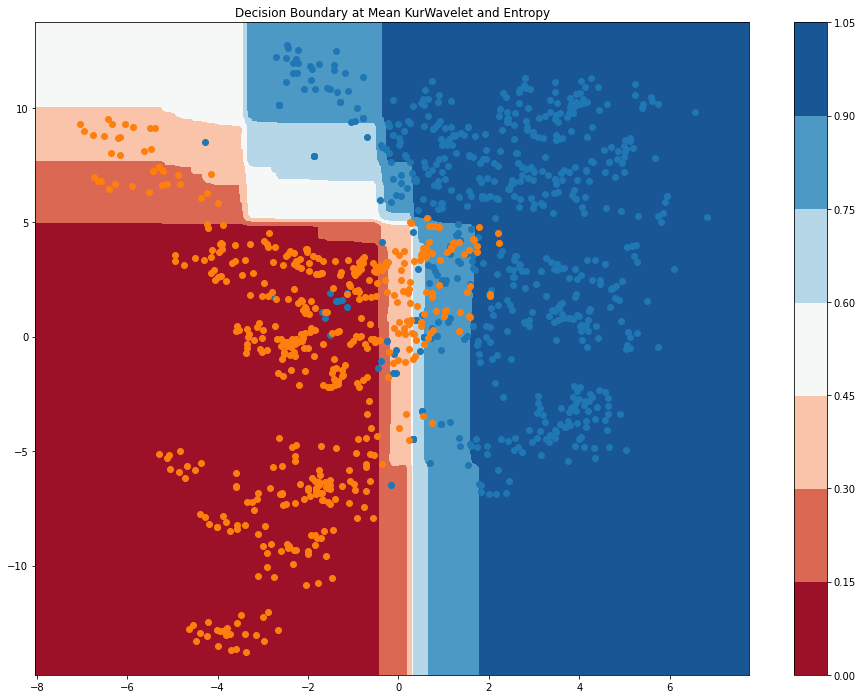

In [29]:
# reshape the predictions back into a grid
zz3 = y_hat3.reshape(xx.shape)

figure(figsize=(16, 12))

# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz3, cmap='RdBu')
# add a legend, called a color bar
plt.colorbar(c)


# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)[0]
    # create scatter of these samples
    plt.scatter(X_train.iloc[row_ix, 0], X_train.iloc[row_ix, 1], cmap='Paired')

plt.title('Decision Boundary at Mean KurWavelet and Entropy')

In [30]:
# look at Decision boundary at different KurWavelet level

fill_1=np.full([grid.shape[0],1],X_train.KurWavelet.mean()-X_train.KurWavelet.std())
fill_2=np.full([grid.shape[0],1],X_train.entropy.mean())

grid_plus=np.hstack((grid,fill_1,fill_2))

In [31]:
# make predictions for the grid,  using probabilities this time
yhat = rnd_clf.predict_proba(grid_plus)
# keep just the probabilities for class 0
y_hat4 = yhat[:, 0] 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Boundary at Mean KurWavelet - 1 STD and Entropy')

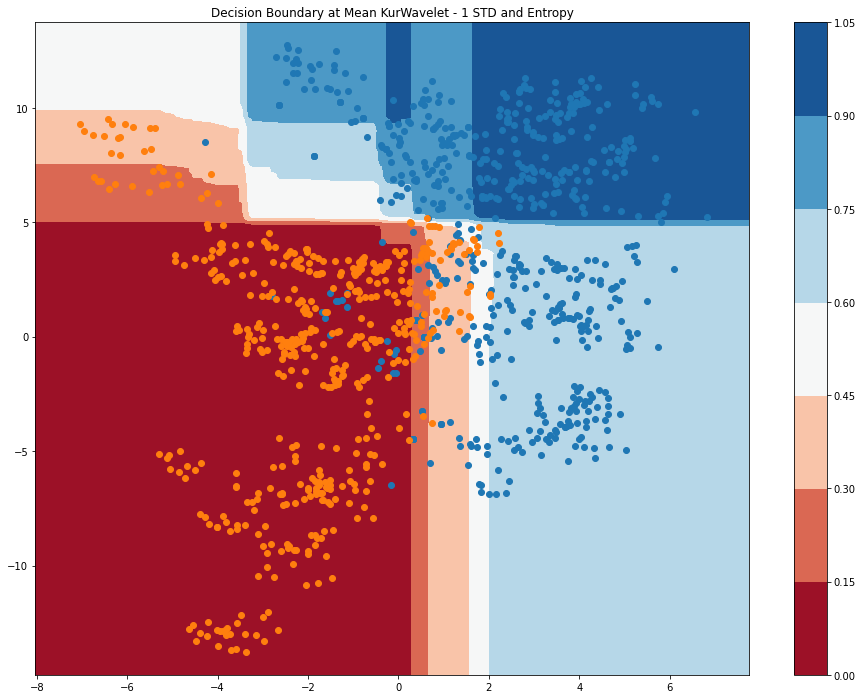

In [32]:
# reshape the predictions back into a grid
zz4 = y_hat4.reshape(xx.shape)

figure(figsize=(16, 12))


# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz4, cmap='RdBu')
# add a legend, called a color bar
plt.colorbar(c)


# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)[0]
    # create scatter of these samples
    plt.scatter(X_train.iloc[row_ix, 0], X_train.iloc[row_ix, 1], cmap='Paired')

plt.title('Decision Boundary at Mean KurWavelet - 1 STD and Entropy')